<a href="https://colab.research.google.com/github/veiji/machine-learning/blob/feature_engineering/notebooks/Feature_Engineering_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Feature Engineering with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/'

In [3]:
df = pd.read_csv(url + 'titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Feature inspection


In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.select_dtypes('O').apply(lambda x:len(x.unique()), axis=0)

,0
Name,891
Sex,2
Ticket,681
Cabin,148
Embarked,4


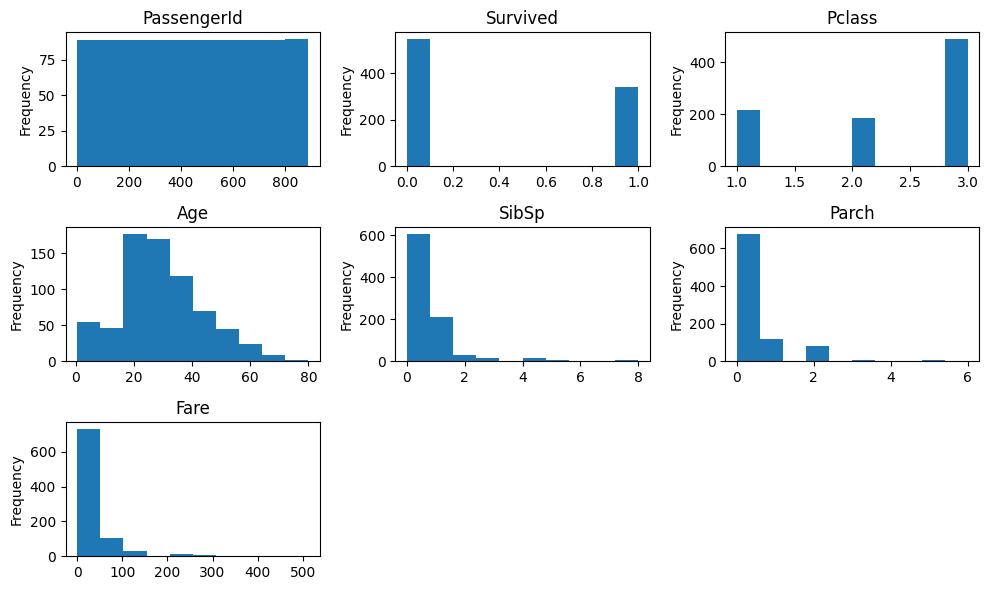

In [7]:
plt.figure(figsize=(10, 6))
i = 1
for c in df.select_dtypes('number').columns:
  plt.subplot(3, 3, i)
  df[c].plot.hist()
  plt.title(c)
  i = i+1

plt.tight_layout()

Missing data:
- drop `'PassengerId', 'Name', 'Cabin', 'Ticket'`
- drop 2 rows with missing Embarked
- impute missing `Age` values with mean

In [8]:
df1 = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [9]:
df1 = df1.dropna(subset=['Embarked'])

In [10]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

#### Scalers

Explore `Age` and `Fare` transformations

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, KBinsDiscretizer, QuantileTransformer

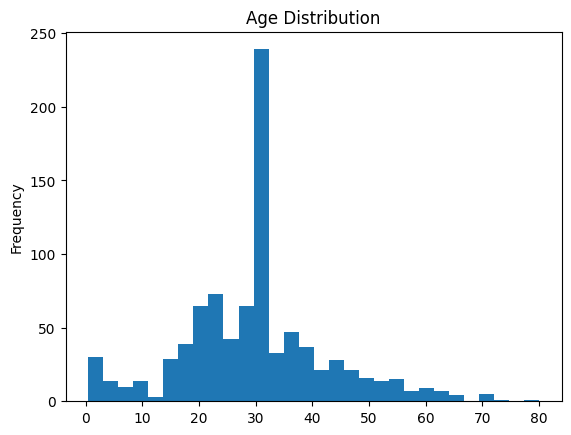

In [12]:
df1['Age'].plot.hist(bins=30, title='Age Distribution');

In [13]:
scaled_age = StandardScaler().fit_transform(df1[['Age']])

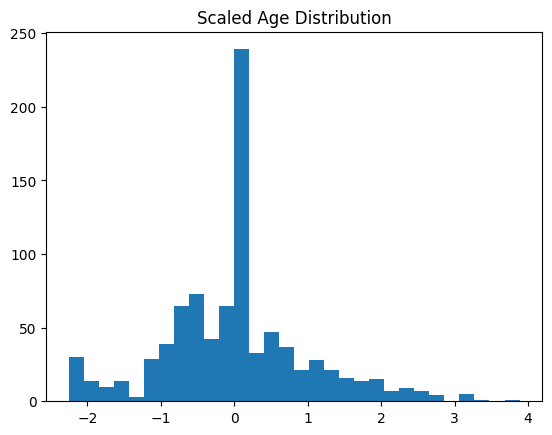

In [14]:
plt.hist(scaled_age, bins=30)
plt.title('Scaled Age Distribution');

In [15]:
kbd = KBinsDiscretizer(n_bins=7, encode='onehot-dense')

age_discretized = kbd.fit_transform(df1[['Age']])

age_discretized

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
kbd.bin_edges_

array([array([ 0.42     , 18.       , 24.       , 29.       , 29.6420927,
              33.       , 43.       , 80.       ])                       ],
      dtype=object)

In [17]:
pd.Series(age_discretized.argmax(axis=1)).value_counts(sort=False)

,count
1,134
5,136
2,117
4,241
6,128
0,113
3,20


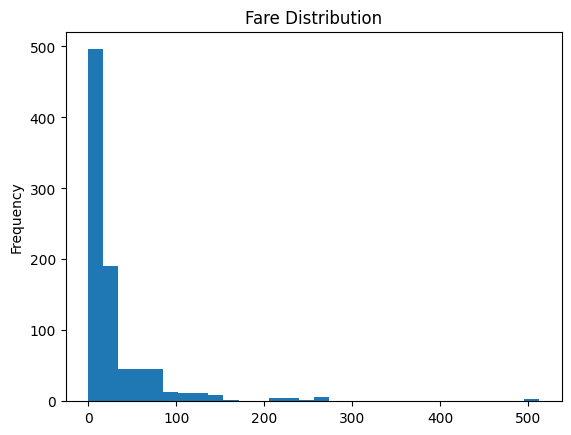

In [18]:
df1['Fare'].plot.hist(bins=30, title='Fare Distribution');

In [19]:
qt = QuantileTransformer(n_quantiles=100)

scaled_fare = qt.fit_transform(df1[['Fare']])

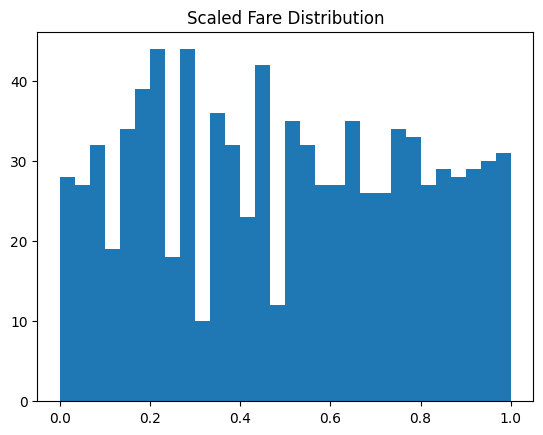

In [20]:
plt.hist(scaled_fare, bins=30)
plt.title('Scaled Fare Distribution');

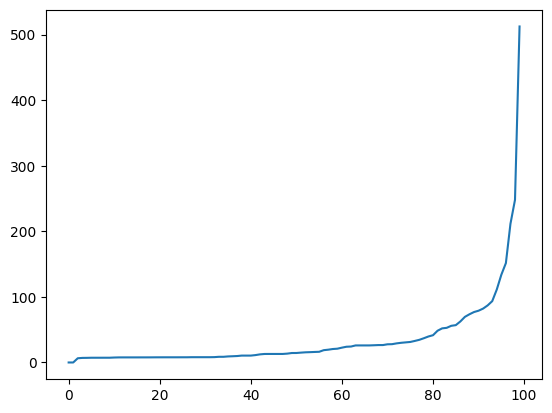

In [21]:
plt.plot(qt.quantiles_);

### Exercise 1
- Create a label variable `y = df1['Survived']`
- Create a variable `X` that only contains the following raw features: `['Pclass', 'Age', 'Fare', 'Parch', 'SibSp']`

- Use the [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) to perform all the following transformations at once on df1:
  - Feature engineering:
    - binarize Sex with `OneHotEncoder`
    - One-hot encode Pclass and Embarked with `OneHotEncoder`
    - Scale Age with `StandardScaler`
    - Discretize Age with `KBinsDiscretizer` into 7 bins.
    - Transform `Fare` with `QuantileTransformer` with 100 quantiles.
    - Create boolean columns for `Parch` and `Sibsp` using `FunctionTransformer` (0 if 0, 1 if > 0)

  - Also, use the `passthrough` option for:
    - `Age`
    - `SibSp`
    - `Parch`

- Create a new variable `X_new` with the transformed features.

If you've done everything correctly you should have the following features:

```python
new_features = ['male',
                'Pclass_1',
                'Pclass_2',
                'Pclass_3',
                'Embarked_C',
                'Embarked_Q',
                'Embarked_S',
                'Age_scaled',
                'Age_bins_0',
                'Age_bins_1',
                'Age_bins_2',
                'Age_bins_3',
                'Age_bins_4',
                'Age_bins_5',
                'Age_bins_6',
                'Fare_transformed',
                'Parch_bool',
                'SibSp_bool',
                'Age',
                'SibSp',
                'Parch'
                ]
```

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
X = df1[['Pclass', 'Age', 'Fare', 'Parch', 'SibSp']]
y = df1['Survived']

In [32]:
# new feature name, the encoder to use, and the current feature to use in this transformation.
column_transformer = ColumnTransformer([
  ('Male', OneHotEncoder(drop="first", dtype=int), ['Sex']),
  ('Pclass', OneHotEncoder(dtype=int), ['Pclass']),
  ('Embarked', OneHotEncoder(dtype=int), ['Embarked']),
  ('AgeScaled', StandardScaler(), ['Age']),
  ('AgeDiscretized', KBinsDiscretizer(n_bins=7), ['Age']),
  ('Fare', QuantileTransformer(n_quantiles=100), ['Fare']),
  ('Parch_bool', FunctionTransformer(lambda x: x > 0), ['Parch']),
  ('SibSp_bool', FunctionTransformer(lambda x: x > 0), ['SibSp']),
  ('Age', 'passthrough', ['Age']),
  ('SibSp', 'passthrough', ['SibSp']),
  ('Parch', 'passthrough', ['Parch'])
], remainder="drop")

column_transformer.fit(df1)

ColumnTransformer(transformers=[('Male',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'int'>),
                                 ['Sex']),
                                ('Pclass', OneHotEncoder(dtype=<class 'int'>),
                                 ['Pclass']),
                                ('Embarked', OneHotEncoder(dtype=<class 'int'>),
                                 ['Embarked']),
                                ('AgeScaled', StandardScaler(), ['Age']),
                                ('AgeDiscretized', KBinsDiscretizer(n_bins=7),
                                 ['Age']),
                                ('Fare', QuantileTransformer(n_quantiles=100),
                                 ['Fare']),
                                ('Parch_bool',
                                 FunctionTransformer(func=<function <lambda> at 0x7aee32a97eb0>),
                                 ['Parch']),
                                ('SibSp_bool',
                                 FunctionTransformer(func=<function <lambda> at 0x7aee32a96b00>),
                                 ['SibSp']),
                                ('Age', 'passthrough', ['Age']),
                                ('SibSp', 'passthrough', ['SibSp']),
                                ('Parch', 'passthrough', ['Parch'])])

In [33]:
X_new = column_transformer.transform(df1)

# what's the new shape of features?
X_new.shape

(889, 21)

### Exercise 2

- Train a `DecisionTreeClassifier` on `X` and `X_new` and compare their performance. For this exercise we will not perform a train/test split and just evaluate the performance on the whole dataset
- Compare the feature importances for the 2 models using the `model.feature_importances_` calculated attribute.
- Bonus points if you plot the features importances with a bar chart
- Which model is performing better?

### Exercise 3: Feature Selection

- Create a final model using the [`Recursive Feature Elimination`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) transformer and re-train it on `X_new`
- Which features are retained?
- Does the model performance drop by a lot?